In [2]:
import ants
import numpy as np

In [4]:
fname1 = ants.get_ants_data('r16')
fname2 = ants.get_ants_data('r64')
print(fname1)
print(fname2)

/Users/mahdi/.antspy/r16slice.jpg
/Users/mahdi/.antspy/r64slice.jpg


In [4]:
img1 = ants.image_read(fname1)
img2 = ants.image_read(fname2)
print(img1)

ANTsImage
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256)
	 Spacing    : (1.0, 1.0)
	 Origin     : (0.0, 0.0)
	 Direction  : [1. 0. 0. 1.]



In [6]:
arr_4d = np.random.randn(70,70,70,10).astype('float32')
img_fmri = ants.from_numpy(arr_4d, has_components=True)
print(img_fmri)

# todo : tester aussi from_nibabel/ to_nibabel (-> .nii.gz)

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 10
	 Dimensions : (70, 70, 70)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]



dict_keys(['segmentation', 'probabilityimages'])


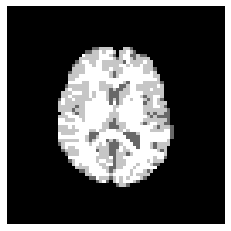

In [7]:
img = ants.image_read(ants.get_ants_data('r16'))
img = ants.resample_image(img, (64,64), 1, 0)
mask = ants.get_mask(img)
img_seg = ants.atropos(a=img, 
                       m='[0.2,1x1]', 
                       c='[2,0]', 
                       i='kmeans[3]', 
                       x=mask)
print(img_seg.keys())
ants.plot(img_seg['segmentation'])

ANTsImage
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (64, 64)
	 Spacing    : (4.0476, 4.0476)
	 Origin     : (0.0, 0.0)
	 Direction  : [1. 0. 0. 1.]



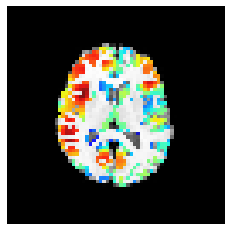

In [8]:
mg = ants.image_read( ants.get_ants_data('r16') ,2)
mask = ants.get_mask( img ).threshold_image( 1, 2 )
segs=ants.atropos( a = img, 
                   m = '[0.2,1x1]', 
                   c = '[2,0]',  
                   i = 'kmeans[3]', 
                   x = mask )
thickimg = ants.kelly_kapowski(s=segs['segmentation'], 
                               g=segs['probabilityimages'][1],
                               w=segs['probabilityimages'][2], 
                               its=45, 
                               r=0.5, 
                               m=1)
print(thickimg)
img.plot(overlay=thickimg, overlay_cmap='jet')

In [21]:
fixed = ants.image_read( ants.get_ants_data('r16') ).resample_image((64,64),1,0)
moving = ants.image_read( ants.get_ants_data('r64') ).resample_image((64,64),1,0)

fixed.overlay(fixed,moving)

mytx = ants.registration(fixed=fixed , moving=moving, type_of_transform='SyN' )
print(mytx)

warped_moving = mytx['warpedmovout']
#fixed.plot(warped_moving)

PlotlyError: The `figure_or_data` positional argument must be `dict`-like, `list`-like, or an instance of plotly.graph_objs.Figure